In [263]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus as pp
import seaborn as sns

from IPython.display import display
from IPython.display import Image

from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

In [264]:
class CONFIG:
    INDEXS = ["R2 Pred", "R2", "EV", "ME", "MEAN_AE", "MSE", "MEDIAN_AE"]

# Load Dataset

In [265]:
header = pd.read_csv("Dataset/header.csv", header=None)
header

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable


In [266]:
training_dataset = pd.read_csv("Dataset/Training/Features_Variant_1.csv",
                               header=None,
                               names=[header.iat[0, i] for i in range(0, 54)])
training_dataset.sample(n=10)

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
39587,90442,0,6802,24,0.0,302.0,39.916667,25.0,49.459172,0.0,...,0,0,0,0,0,1,0,0,0,6
2444,3544586,122388,227617,9,0.0,1535.0,147.316239,90.0,195.449565,0.0,...,1,0,1,0,0,0,0,0,0,6
26804,879585,11,49540,9,0.0,1104.0,101.487562,43.0,176.066448,0.0,...,0,1,0,0,0,0,0,0,1,4
32550,274207,0,100435,18,2.0,664.0,134.565854,74.0,136.996428,0.0,...,0,0,0,1,0,0,0,0,0,57
10850,441554,0,60660,4,0.0,2328.0,71.828829,42.0,165.413643,0.0,...,0,0,0,0,0,0,0,1,0,2
11986,1791,0,99,18,1.0,5.0,3.000000,3.0,2.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
8481,32745,1559,770,32,0.0,15.0,1.376884,0.0,2.368908,0.0,...,0,0,0,0,0,0,1,0,0,0
10325,94905,0,5573,18,0.0,256.0,18.801282,12.0,24.306383,0.0,...,0,0,0,0,0,0,0,0,1,2
8229,165002,0,25302,36,0.0,605.0,64.895928,32.0,88.303380,0.0,...,0,0,0,0,1,0,0,0,0,3
6681,285320,0,5510,24,2.0,274.0,40.594595,18.0,60.387246,0.0,...,0,0,0,1,0,0,0,0,0,13


In [267]:
features = training_dataset.iloc[:, :53]
features

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,0,1
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,0,0,1
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,1,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0
40945,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0
40946,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,0
40947,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0


In [269]:
training_dataset.corr()

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
Page Popularity/likes,1.000000,0.044839,0.623436,-0.042167,0.059575,0.158714,0.166425,0.145216,0.174597,0.015750,...,-0.009503,0.003397,-0.003665,0.006125,-0.000433,0.003840,0.006070,-0.003045,-0.008862,0.058918
Page Checkinsâ€™s,0.044839,1.000000,0.166850,-0.060181,-0.002830,0.169236,0.154968,0.121734,0.178410,-0.003997,...,-0.005844,0.007936,-0.000324,0.008330,0.002385,-0.006826,0.000313,0.000873,-0.004329,0.022982
Page talking about,0.623436,0.166850,1.000000,-0.148685,0.181432,0.482016,0.518604,0.455487,0.541041,0.059709,...,-0.027627,-0.007700,-0.016521,-0.001683,0.006739,0.020424,0.024486,-0.011423,-0.022755,0.177330
Page Category,-0.042167,-0.060181,-0.148685,1.000000,-0.041646,-0.313601,-0.229936,-0.188769,-0.288469,-0.011617,...,0.002942,-0.002263,0.008858,-0.004926,-0.008104,-0.003160,-0.002917,0.011931,-0.001835,-0.073673
Derived5,0.059575,-0.002830,0.181432,-0.041646,1.000000,0.127576,0.474400,0.551731,0.202030,0.610646,...,-0.006791,-0.006288,0.000411,-0.005560,0.003863,0.004396,0.006181,-0.000473,-0.009087,0.156940
Derived6,0.158714,0.169236,0.482016,-0.313601,0.127576,1.000000,0.706975,0.574617,0.895083,0.045730,...,-0.010858,-0.007634,-0.009277,-0.002204,0.003126,0.010823,0.005458,-0.001994,-0.006246,0.231432
Derived7,0.166425,0.154968,0.518604,-0.229936,0.474400,0.706975,1.000000,0.963965,0.894524,0.222304,...,-0.017237,-0.004111,-0.007631,-0.006261,0.007653,0.005512,0.013246,-0.001624,-0.011320,0.334986
Derived8,0.145216,0.121734,0.455487,-0.188769,0.551731,0.574617,0.963965,1.000000,0.765472,0.266495,...,-0.015482,-0.002106,-0.005210,-0.007170,0.008770,0.001387,0.012772,-0.001196,-0.009712,0.325367
Derived9,0.174597,0.178410,0.541041,-0.288469,0.202030,0.895083,0.894524,0.765472,1.000000,0.062964,...,-0.016389,-0.009239,-0.011792,-0.006018,0.004579,0.012609,0.013428,-0.003172,-0.010236,0.300229
Derived10,0.015750,-0.003997,0.059709,-0.011617,0.610646,0.045730,0.222304,0.266495,0.062964,1.000000,...,-0.004967,-0.004455,-0.003601,-0.005171,-0.000542,0.011366,0.001631,0.001868,-0.005928,0.103345


In [214]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.3, random_state=42)

In [215]:
features.corr()

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
Page Popularity/likes,1.000000,0.044839,0.623436,-0.042167,0.059575,0.158714,0.166425,0.145216,0.174597,0.015750,...,-0.003134,-0.009503,0.003397,-0.003665,0.006125,-0.000433,0.003840,0.006070,-0.003045,-0.008862
Page Checkinsâ€™s,0.044839,1.000000,0.166850,-0.060181,-0.002830,0.169236,0.154968,0.121734,0.178410,-0.003997,...,0.003990,-0.005844,0.007936,-0.000324,0.008330,0.002385,-0.006826,0.000313,0.000873,-0.004329
Page talking about,0.623436,0.166850,1.000000,-0.148685,0.181432,0.482016,0.518604,0.455487,0.541041,0.059709,...,-0.016917,-0.027627,-0.007700,-0.016521,-0.001683,0.006739,0.020424,0.024486,-0.011423,-0.022755
Page Category,-0.042167,-0.060181,-0.148685,1.000000,-0.041646,-0.313601,-0.229936,-0.188769,-0.288469,-0.011617,...,0.009626,0.002942,-0.002263,0.008858,-0.004926,-0.008104,-0.003160,-0.002917,0.011931,-0.001835
Derived5,0.059575,-0.002830,0.181432,-0.041646,1.000000,0.127576,0.474400,0.551731,0.202030,0.610646,...,0.002622,-0.006791,-0.006288,0.000411,-0.005560,0.003863,0.004396,0.006181,-0.000473,-0.009087
Derived6,0.158714,0.169236,0.482016,-0.313601,0.127576,1.000000,0.706975,0.574617,0.895083,0.045730,...,0.000519,-0.010858,-0.007634,-0.009277,-0.002204,0.003126,0.010823,0.005458,-0.001994,-0.006246
Derived7,0.166425,0.154968,0.518604,-0.229936,0.474400,0.706975,1.000000,0.963965,0.894524,0.222304,...,-0.002751,-0.017237,-0.004111,-0.007631,-0.006261,0.007653,0.005512,0.013246,-0.001624,-0.011320
Derived8,0.145216,0.121734,0.455487,-0.188769,0.551731,0.574617,0.963965,1.000000,0.765472,0.266495,...,-0.002615,-0.015482,-0.002106,-0.005210,-0.007170,0.008770,0.001387,0.012772,-0.001196,-0.009712
Derived9,0.174597,0.178410,0.541041,-0.288469,0.202030,0.895083,0.894524,0.765472,1.000000,0.062964,...,-0.004325,-0.016389,-0.009239,-0.011792,-0.006018,0.004579,0.012609,0.013428,-0.003172,-0.010236
Derived10,0.015750,-0.003997,0.059709,-0.011617,0.610646,0.045730,0.222304,0.266495,0.062964,1.000000,...,-0.000577,-0.004967,-0.004455,-0.003601,-0.005171,-0.000542,0.011366,0.001631,0.001868,-0.005928


# Decision Tree

## Model Training

In [216]:
def train_model(model):
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    return predict

In [217]:
def plot_test_predict(y_train, y_test, predict, axes=None, k=None):
    test_predict = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(predict.transpose())], axis=1)
    headers = ["Test", "Predict"]
    test_predict.columns = headers
    if axes is not None and k is not None:
        sns.lineplot(data=test_predict.sample(n=50), ax=axes[k]).set_title("Test Predict Curve k = " + str(k))
    else:
        sns.lineplot(data=test_predict.sample(n=50)).set_title("Test Predict Curve")
    plt.show()
    sns.residplot(x=y_test.to_numpy(), y=predict, lowess=True).set_title("Residuals")
    plt.show()

## Model Evaluation

In [218]:
def evaluate(model, X_test, y_test, predict):

    # R-Squared Prediction
    r2_pred = model.score(X_test, y_test)
    
    # R-Squared
    r2 = r2_score(y_test, predict)
    
    # Explained Variance Score
    ev = explained_variance_score(y_test, predict)
    
    # Max Error
    me = max_error(y_test, predict)
    
    # Mean Absolute Error
    mean_ae = mean_absolute_error(y_test, predict)
    
    # Mean Squared Error
    mse = mean_squared_error(y_test, predict)
    
    # Median Absolute Error
    median_ae = median_absolute_error(y_test, predict)
    
    return r2_pred, r2, ev, me, mean_ae, mse, median_ae

## Draw Tree

In [67]:
def draw_tree(model, X_train, y_train):
    dot_data = tree.export_graphviz(model, out_file=None,
                                    feature_names=X_train.columns,
                                    class_names=y_train.columns,  
                                    filled=True,
                                    rounded=True,
                                    special_characters=True)
    graph = pp.graph_from_dot_data(dot_data)
    img = Image(graph.create_png())
    display(img)

## Final Model

In [219]:
def train_final_model(max_depth=None, min_samples_split=2):
    # DecisionTreeRegressor
    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)

    # Model Training
    predict = train_model(model)
    plot_test_predict(y_train, y_test, predict)

    # Model Evaluation
    r2_pred, r2, ev, me, mean_ae, mse, median_ae = evaluate(model, X_test, y_test, predict)

    results = pd.DataFrame({
        "Index": CONFIG.INDEXS, 
        "Mean": [r2_pred, r2, ev, me, mean_ae, mse, median_ae]
    })
    print(results)

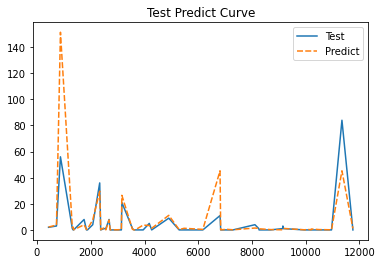

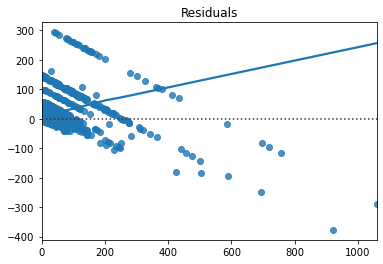

       Index        Mean
0    R2 Pred    0.483877
1         R2    0.483877
2         EV    0.484041
3         ME  768.611702
4    MEAN_AE    4.982692
5        MSE  524.116312
6  MEDIAN_AE    0.557078


In [220]:
train_final_model(max_depth=10, min_samples_split=.015)

#### Not that great of a model. Let's try some feature engineering.

In [221]:
df = training_dataset

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Page Popularity/likes     40949 non-null  int64  
 1   Page Checkinsâ€™s         40949 non-null  int64  
 2   Page talking about        40949 non-null  int64  
 3   Page Category             40949 non-null  int64  
 4   Derived5                  40949 non-null  float64
 5   Derived6                  40949 non-null  float64
 6   Derived7                  40949 non-null  float64
 7   Derived8                  40949 non-null  float64
 8   Derived9                  40949 non-null  float64
 9   Derived10                 40949 non-null  float64
 10  Derived11                 40949 non-null  float64
 11  Derived12                 40949 non-null  float64
 12  Derived13                 40949 non-null  float64
 13  Derived14                 40949 non-null  float64
 14  Derive

In [222]:
df.insert(46, "posted on weekday", (df["Post published weekday-Monday"] | df["Post published weekday-Tuesday"] | df["Post published weekday-Wednesday"] | df["Post published weekday-Thursday"] | df["Post published weekday-Friday"]).astype("int"))

In [223]:
df.head()

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Saturday,posted on weekday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,1,0,0,0,0


In [224]:
df.insert(45, "base dateTime on weekend", (df["Base DateTime weekday-Sunday"] | df["Base DateTime weekday-Saturday"]).astype("int"))

In [225]:
df.head()

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Saturday,posted on weekday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,1,0,0,0,0


In [226]:
df.columns

Index(['Page Popularity/likes', 'Page Checkinsâ€™s', 'Page talking about',
       'Page Category', 'Derived5', 'Derived6', 'Derived7', 'Derived8',
       'Derived9', 'Derived10', 'Derived11', 'Derived12', 'Derived13',
       'Derived14', 'Derived15', 'Derived16', 'Derived17', 'Derived18',
       'Derived19', 'Derived20', 'Derived21', 'Derived22', 'Derived23',
       'Derived24', 'Derived25', 'Derived26', 'Derived27', 'Derived28',
       'Derived29', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base time',
       'Post length', 'Post Share Count', 'Post Promotion Status', 'H Local',
       'Post published weekday-Sunday', 'Post published weekday-Monday',
       'Post published weekday-Tuesday', 'Post published weekday-Wednesday',
       'Post published weekday-Thursday', 'Post published weekday-Friday',
       'base dateTime on weekend', 'Post published weekday-Saturday',
       'posted on weekday', 'Base DateTime weekday-Sunday',
       'Base DateTime weekday-Monday', 'Base DateTime weekday-Tue

Performed feature extraction on base dateTime and Post published columns, so can drop these

In [227]:
df.drop(['Base DateTime weekday-Sunday',
       'Base DateTime weekday-Monday', 'Base DateTime weekday-Tuesday',
       'Base DateTime weekday-Wednesday', 'Base DateTime weekday-Thursday',
       'Base DateTime weekday-Friday', 'Base DateTime weekday-Saturday',
       'Post published weekday-Saturday','Post published weekday-Sunday', 
       'Post published weekday-Monday', 'Post published weekday-Tuesday',
       'Post published weekday-Wednesday', 'Post published weekday-Thursday',
       'Post published weekday-Friday', 'Post Promotion Status'], axis = 1, inplace = True)

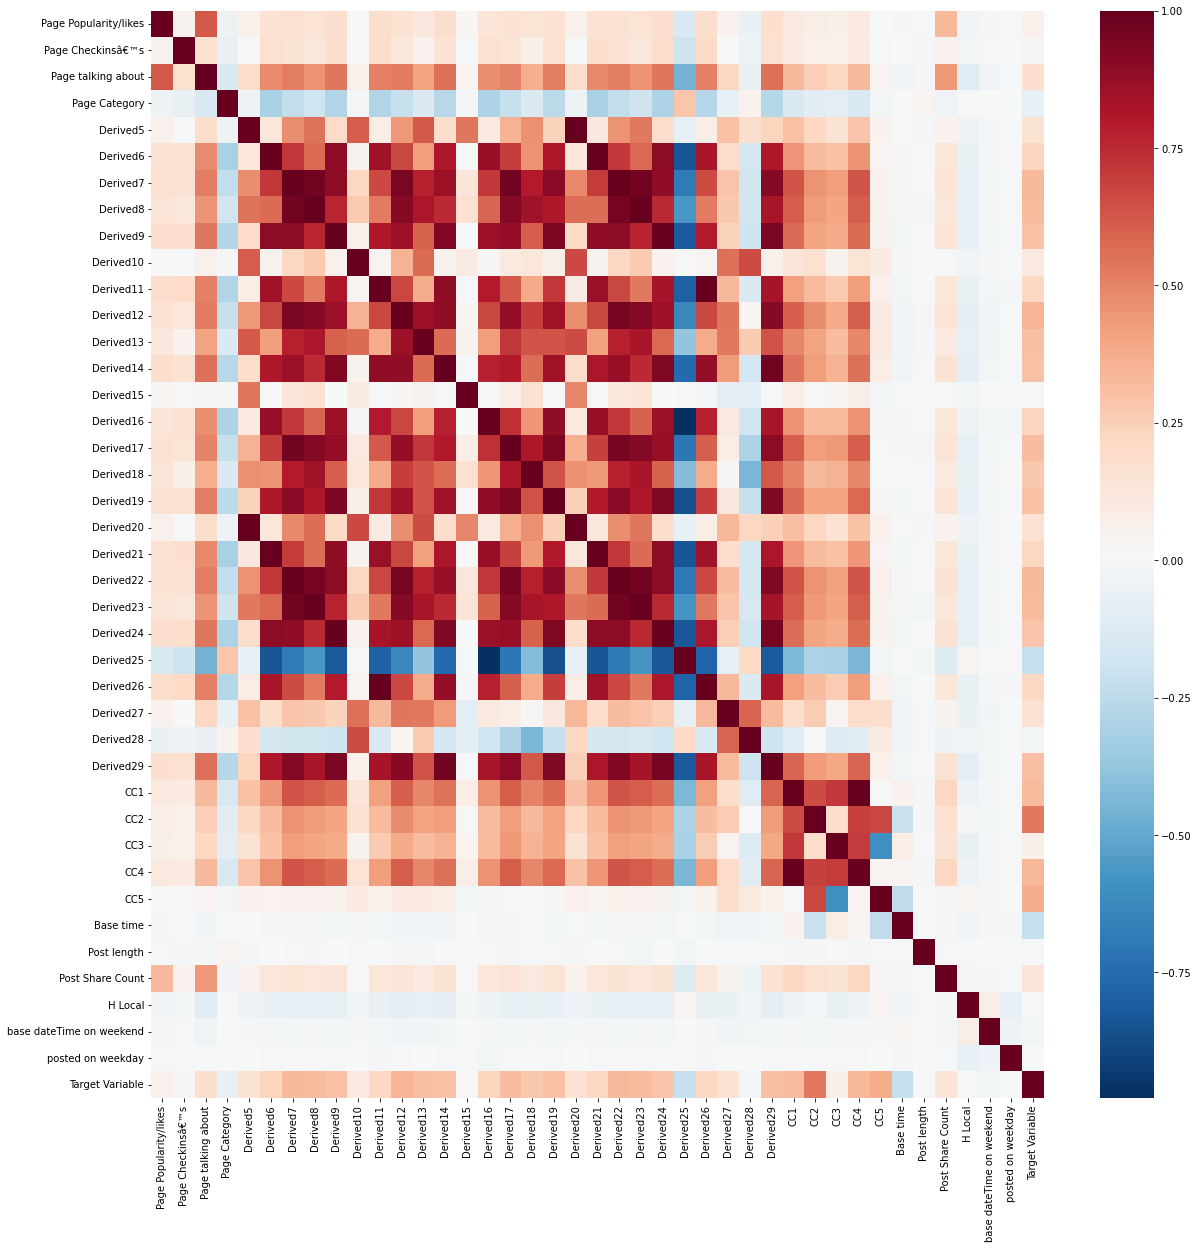

In [257]:
corr = df.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(data=corr, cmap="RdBu_r")
plt.show()

In [256]:
df.corr()

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,CC3,CC4,CC5,Base time,Post length,Post Share Count,H Local,base dateTime on weekend,posted on weekday,Target Variable
Page Popularity/likes,1.000000,0.044839,0.623436,-0.042167,0.059575,0.158714,0.166425,0.145216,0.174597,0.015750,...,0.071448,0.104064,0.009764,-0.005717,-0.003509,0.331114,-0.021676,-0.009725,0.000369,0.058918
Page Checkinsâ€™s,0.044839,1.000000,0.166850,-0.060181,-0.002830,0.169236,0.154968,0.121734,0.178410,-0.003997,...,0.064703,0.101214,0.001620,0.004760,-0.005189,0.052569,-0.014528,-0.003620,-0.002310,0.022982
Page talking about,0.623436,0.166850,1.000000,-0.148685,0.181432,0.482016,0.518604,0.455487,0.541041,0.059709,...,0.217939,0.329399,0.041487,-0.024592,-0.011251,0.443296,-0.107347,-0.030456,0.000151,0.177330
Page Category,-0.042167,-0.060181,-0.148685,1.000000,-0.041646,-0.313601,-0.229936,-0.188769,-0.288469,-0.011617,...,-0.094728,-0.148661,-0.013638,0.003876,0.037214,-0.028564,0.017831,0.005403,0.007184,-0.073673
Derived5,0.059575,-0.002830,0.181432,-0.041646,1.000000,0.127576,0.474400,0.551731,0.202030,0.610646,...,0.156582,0.289571,0.055628,0.003990,-0.010387,0.052372,-0.046697,-0.006757,0.007538,0.156940
Derived6,0.158714,0.169236,0.482016,-0.313601,0.127576,1.000000,0.706975,0.574617,0.895083,0.045730,...,0.303861,0.452087,0.034177,-0.012257,0.007127,0.127575,-0.056575,-0.012016,-0.002822,0.231432
Derived7,0.166425,0.154968,0.518604,-0.229936,0.474400,0.706975,1.000000,0.963965,0.894524,0.222304,...,0.420784,0.633360,0.055044,-0.009098,-0.003967,0.149473,-0.076800,-0.014698,-0.000413,0.334986
Derived8,0.145216,0.121734,0.455487,-0.188769,0.551731,0.574617,0.963965,1.000000,0.765472,0.266495,...,0.403089,0.608511,0.052335,-0.004947,-0.012023,0.133099,-0.067240,-0.011579,-0.000422,0.325367
Derived9,0.174597,0.178410,0.541041,-0.288469,0.202030,0.895083,0.894524,0.765472,1.000000,0.062964,...,0.386216,0.569894,0.044485,-0.015809,0.004678,0.149003,-0.080926,-0.017062,0.000965,0.300229
Derived10,0.015750,-0.003997,0.059709,-0.011617,0.610646,0.045730,0.222304,0.266495,0.062964,1.000000,...,0.046963,0.142800,0.103135,-0.006412,-0.004009,0.016971,-0.021429,-0.007391,0.006535,0.103345


In [230]:
df.columns

Index(['Page Popularity/likes', 'Page Checkinsâ€™s', 'Page talking about',
       'Page Category', 'Derived5', 'Derived6', 'Derived7', 'Derived8',
       'Derived9', 'Derived10', 'Derived11', 'Derived12', 'Derived13',
       'Derived14', 'Derived15', 'Derived16', 'Derived17', 'Derived18',
       'Derived19', 'Derived20', 'Derived21', 'Derived22', 'Derived23',
       'Derived24', 'Derived25', 'Derived26', 'Derived27', 'Derived28',
       'Derived29', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base time',
       'Post length', 'Post Share Count', 'H Local',
       'base dateTime on weekend', 'posted on weekday', 'Target Variable'],
      dtype='object')

The model accuracy is not that good, so let's try PCA!

I'm thinking of clubbing CC1-CC5 together and do a 5-5 grouping of Derived5-Derived29

For PCA, I'll first standardize the data.

### PCA

In [238]:
from sklearn.preprocessing import StandardScaler

# combining the CC1-CC5 features
# seperating out the features
features = ['CC1', 'CC2', 'CC3', 'CC4', 'CC5']
X = df.loc[:, features].values

y = df.loc[:,'Target Variable'].values

# Standardizing the training data

X_transformed = StandardScaler().fit_transform(X)

In [247]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_transformed)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['CC principal component 1', 'CC principal component 2'])

principalDf

,CC principal component 1,CC principal component 2
0,-0.702169,-0.012174
1,-0.702169,-0.012174
2,-0.702169,-0.012174
3,-0.625260,-0.057569
4,-0.693632,-0.012454
...,...,...
40944,1.878323,-0.728969
40945,5.406387,-1.444436
40946,8.162370,8.537278
40947,8.090362,-3.898442


In [249]:
finalDf = pd.concat([principalDf, df], axis = 1)
finalDf.head()

,CC principal component 1,CC principal component 2,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,...,CC3,CC4,CC5,Base time,Post length,Post Share Count,H Local,base dateTime on weekend,posted on weekday,Target Variable
0,-0.702169,-0.012174,634995,0,463,1,0.0,806.0,11.291045,1.0,...,0,0,0,65,166,2,24,1,1,0
1,-0.702169,-0.012174,634995,0,463,1,0.0,806.0,11.291045,1.0,...,0,0,0,10,132,1,24,0,1,0
2,-0.702169,-0.012174,634995,0,463,1,0.0,806.0,11.291045,1.0,...,0,0,0,14,133,2,24,1,1,0
3,-0.625260,-0.057569,634995,0,463,1,0.0,806.0,11.291045,1.0,...,3,7,-3,62,131,1,24,0,1,0
4,-0.693632,-0.012454,634995,0,463,1,0.0,806.0,11.291045,1.0,...,0,1,0,58,142,5,24,0,1,0


In [250]:
finalDf.drop(['CC1', 'CC2', 'CC3', 'CC4', 'CC5'], axis = 1, inplace = True)

finalDf.head()

,CC principal component 1,CC principal component 2,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,...,Derived27,Derived28,Derived29,Base time,Post length,Post Share Count,H Local,base dateTime on weekend,posted on weekday,Target Variable
0,-0.702169,-0.012174,634995,0,463,1,0.0,806.0,11.291045,1.0,...,4.970149,0.0,69.85058,65,166,2,24,1,1,0
1,-0.702169,-0.012174,634995,0,463,1,0.0,806.0,11.291045,1.0,...,4.970149,0.0,69.85058,10,132,1,24,0,1,0
2,-0.702169,-0.012174,634995,0,463,1,0.0,806.0,11.291045,1.0,...,4.970149,0.0,69.85058,14,133,2,24,1,1,0
3,-0.625260,-0.057569,634995,0,463,1,0.0,806.0,11.291045,1.0,...,4.970149,0.0,69.85058,62,131,1,24,0,1,0
4,-0.693632,-0.012454,634995,0,463,1,0.0,806.0,11.291045,1.0,...,4.970149,0.0,69.85058,58,142,5,24,0,1,0


In [251]:
labels = finalDf["Target Variable"]
features = finalDf.drop(["Target Variable"], axis = 1)

In [252]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.3, random_state=42)

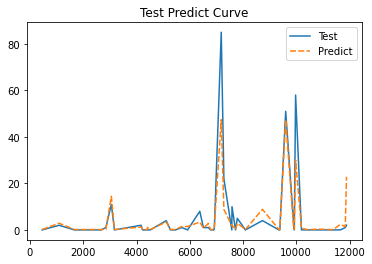

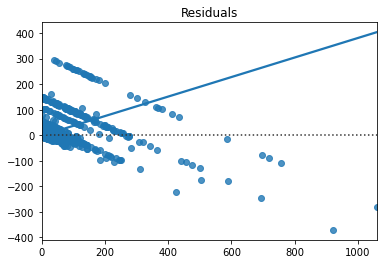

       Index        Mean
0    R2 Pred    0.472295
1         R2    0.472295
2         EV    0.472487
3         ME  768.611702
4    MEAN_AE    5.178843
5        MSE  535.877709
6  MEDIAN_AE    0.638376


In [253]:
train_final_model(max_depth=12, min_samples_split=.015)

really bad accuracy, PCA also didn't help.

Going to plot the correlation matrix and drop columns that are not as related

In [261]:
finalDf.corr()

,CC principal component 1,CC principal component 2,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,...,Derived27,Derived28,Derived29,Base time,Post length,Post Share Count,H Local,base dateTime on weekend,posted on weekday,Target Variable
CC principal component 1,1.000000e+00,-1.395120e-16,0.104549,0.095572,0.328698,-0.144215,0.282331,0.445275,0.625707,0.601089,...,0.199890,-0.096287,0.583258,-0.002637,-0.005647,0.225489,-0.049151,-0.014606,-0.002392,0.368656
CC principal component 2,-1.395120e-16,1.000000e+00,0.005102,-0.002594,0.026891,-0.007264,0.043008,0.014429,0.027239,0.025604,...,0.177566,0.113173,0.034255,-0.239882,-0.001943,0.015552,0.040566,-0.008100,0.004484,0.362381
Page Popularity/likes,1.045488e-01,5.102057e-03,1.000000,0.044839,0.623436,-0.042167,0.059575,0.158714,0.166425,0.145216,...,0.052423,-0.055590,0.178515,-0.005717,-0.003509,0.331114,-0.021676,-0.009725,0.000369,0.058918
Page Checkinsâ€™s,9.557185e-02,-2.594296e-03,0.044839,1.000000,0.166850,-0.060181,-0.002830,0.169236,0.154968,0.121734,...,0.008698,-0.041344,0.167607,0.004760,-0.005189,0.052569,-0.014528,-0.003620,-0.002310,0.022982
Page talking about,3.286984e-01,2.689089e-02,0.623436,0.166850,1.000000,-0.148685,0.181432,0.482016,0.518604,0.455487,...,0.222756,-0.063186,0.557505,-0.024592,-0.011251,0.443296,-0.107347,-0.030456,0.000151,0.177330
Page Category,-1.442153e-01,-7.263714e-03,-0.042167,-0.060181,-0.148685,1.000000,-0.041646,-0.313601,-0.229936,-0.188769,...,-0.073228,0.050016,-0.269308,0.003876,0.037214,-0.028564,0.017831,0.005403,0.007184,-0.073673
Derived5,2.823305e-01,4.300850e-02,0.059575,-0.002830,0.181432,-0.041646,1.000000,0.127576,0.474400,0.551731,...,0.298680,0.179207,0.234663,0.003990,-0.010387,0.052372,-0.046697,-0.006757,0.007538,0.156940
Derived6,4.452745e-01,1.442906e-02,0.158714,0.169236,0.482016,-0.313601,0.127576,1.000000,0.706975,0.574617,...,0.183505,-0.164431,0.813573,-0.012257,0.007127,0.127575,-0.056575,-0.012016,-0.002822,0.231432
Derived7,6.257068e-01,2.723855e-02,0.166425,0.154968,0.518604,-0.229936,0.474400,0.706975,1.000000,0.963965,...,0.295545,-0.177267,0.920598,-0.009098,-0.003967,0.149473,-0.076800,-0.014698,-0.000413,0.334986
Derived8,6.010886e-01,2.560441e-02,0.145216,0.121734,0.455487,-0.188769,0.551731,0.574617,0.963965,1.000000,...,0.280999,-0.176468,0.822942,-0.004947,-0.012023,0.133099,-0.067240,-0.011579,-0.000422,0.325367


In [262]:
finalDf.columns

Index(['CC principal component 1', 'CC principal component 2',
       'Page Popularity/likes', 'Page Checkinsâ€™s', 'Page talking about',
       'Page Category', 'Derived5', 'Derived6', 'Derived7', 'Derived8',
       'Derived9', 'Derived10', 'Derived11', 'Derived12', 'Derived13',
       'Derived14', 'Derived15', 'Derived16', 'Derived17', 'Derived18',
       'Derived19', 'Derived20', 'Derived21', 'Derived22', 'Derived23',
       'Derived24', 'Derived25', 'Derived26', 'Derived27', 'Derived28',
       'Derived29', 'Base time', 'Post length', 'Post Share Count', 'H Local',
       'base dateTime on weekend', 'posted on weekday', 'Target Variable'],
      dtype='object')

In [271]:
features_to_drop = ['Page Popularity/likes', 'Page Checkinsâ€™s', 
                    'Page Category', 'Derived15', 'Derived28', 'Post length',
                    'H Local', 'base dateTime on weekend', 'posted on weekday']

final_df_dropped = finalDf.drop(features_to_drop, axis = 1)

In [280]:
final_df_dropped.head()

,CC principal component 1,CC principal component 2,Page talking about,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,Derived11,...,Derived22,Derived23,Derived24,Derived25,Derived26,Derived27,Derived29,Base time,Post Share Count,Target Variable
0,-0.702169,-0.012174,463,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,...,10.649254,1.0,70.254788,-69.0,806.0,4.970149,69.85058,65,2,0
1,-0.702169,-0.012174,463,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,...,10.649254,1.0,70.254788,-69.0,806.0,4.970149,69.85058,10,1,0
2,-0.702169,-0.012174,463,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,...,10.649254,1.0,70.254788,-69.0,806.0,4.970149,69.85058,14,2,0
3,-0.625260,-0.057569,463,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,...,10.649254,1.0,70.254788,-69.0,806.0,4.970149,69.85058,62,1,0
4,-0.693632,-0.012454,463,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,...,10.649254,1.0,70.254788,-69.0,806.0,4.970149,69.85058,58,5,0


In [279]:
features = ['Derived5', 'Derived6', 'Derived7', 'Derived8', 'Derived9',
           'Derived10', 'Derived11', 'Derived12', 'Derived13', 'Derived15',
           'Derived16', 'Derived17', 'Derived18', 'Derived19', 'Derived20',
           'Derived21', 'Derived22', 'Derived23', 'Derived24',
           'Derived25', 'Derived26', 'Derived27', 'Derived28', 'Derived29']
X = df.loc[:, features].values

# Standardizing the training data

X_transformed = StandardScaler().fit_transform(X)


pca = PCA(n_components=12)
principalComponents = pca.fit_transform(X_transformed)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Derived principal component 1', 'Derived principal component 2',
                         'Derived principal component 3', 'Derived principal component 4',
                         'Derived principal component 5', 'Derived principal component 6',
                         'Derived principal component 7', 'Derived principal component 8',
                         'Derived principal component 9', 'Derived principal component 10',
                         'Derived principal component 11', 'Derived principal component 12'])

finalDf = pd.concat([principalDf, df], axis = 1)

finalDf.head()

,Derived principal component 1,Derived principal component 2,Derived principal component 3,Derived principal component 4,Derived principal component 5,Derived principal component 6,Derived principal component 7,Derived principal component 8,Derived principal component 9,Derived principal component 10,...,CC3,CC4,CC5,Base time,Post length,Post Share Count,H Local,base dateTime on weekend,posted on weekday,Target Variable
0,-0.257029,-0.887672,1.293232,1.170232,-1.199112,-1.065428,0.644424,0.046647,0.91953,-0.374167,...,0,0,0,65,166,2,24,1,1,0
1,-0.257029,-0.887672,1.293232,1.170232,-1.199112,-1.065428,0.644424,0.046647,0.91953,-0.374167,...,0,0,0,10,132,1,24,0,1,0
2,-0.257029,-0.887672,1.293232,1.170232,-1.199112,-1.065428,0.644424,0.046647,0.91953,-0.374167,...,0,0,0,14,133,2,24,1,1,0
3,-0.257029,-0.887672,1.293232,1.170232,-1.199112,-1.065428,0.644424,0.046647,0.91953,-0.374167,...,3,7,-3,62,131,1,24,0,1,0
4,-0.257029,-0.887672,1.293232,1.170232,-1.199112,-1.065428,0.644424,0.046647,0.91953,-0.374167,...,0,1,0,58,142,5,24,0,1,0


In [281]:
features_to_drop = ['Page Popularity/likes', 'Page Checkinsâ€™s', 
                    'Page Category', 'Derived15', 'Derived28', 'Post length',
                    'H Local', 'base dateTime on weekend', 'posted on weekday',
                    'Derived5', 'Derived6', 'Derived7', 'Derived8', 'Derived9',
                    'Derived10', 'Derived11', 'Derived12', 'Derived13', 'Derived15',
                    'Derived16', 'Derived17', 'Derived18', 'Derived19', 'Derived20',
                    'Derived21', 'Derived22', 'Derived23', 'Derived24',
                    'Derived25', 'Derived26', 'Derived27', 'Derived28', 'Derived29']

final_df_dropped = finalDf.drop(features_to_drop, axis = 1)

In [282]:
labels = finalDf["Target Variable"]
features = finalDf.drop(["Target Variable"], axis = 1)

In [283]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.3, random_state=42)

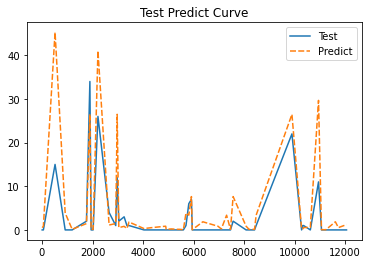

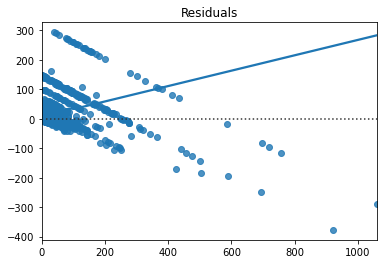

       Index        Mean
0    R2 Pred    0.484686
1         R2    0.484686
2         EV    0.484850
3         ME  768.611702
4    MEAN_AE    4.972350
5        MSE  523.294508
6  MEDIAN_AE    0.525223


In [284]:
train_final_model(max_depth=12, min_samples_split=.015)

#### Okay this also did not help. I think need to drop decision tree regressor from consideration.

#### TA said to try GridSearchCV with different parameters. Here goes:

In [124]:
from sklearn.model_selection import GridSearchCV

tree_para = {'max_depth' : [10, 11, 12], 'min_samples_split': [0.01,0.015,0.02]}
clf = GridSearchCV(DecisionTreeRegressor(), tree_para, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_split': [0.01, 0.015, 0.02]})

In [125]:
clf.best_params_

{'max_depth': 10, 'min_samples_split': 0.01}

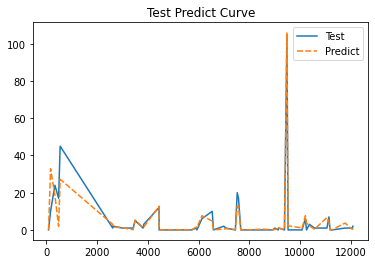

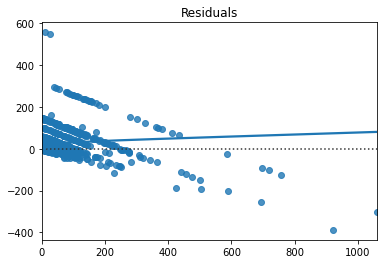

       Index        Mean
0    R2 Pred    0.447724
1         R2    0.447724
2         EV    0.447932
3         ME  768.611702
4    MEAN_AE    4.907189
5        MSE  560.829133
6  MEDIAN_AE    0.532129


In [126]:
train_final_model(max_depth=10, min_samples_split=.01)

#### GridSearchCV did not help as out model already has a better performance with R2 Pred = 0.484.

#### So, best decision tree regressor has params: max_depth = 12, min_samples_split = 0.015